## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [ ]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [ ]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


### Create count vectorizer


In [ ]:
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [ ]:
print(list(vect.vocabulary_.keys())[:50])

['most', 'is', 'the', 'story', 'of', 'single', 'father', 'who', 'takes', 'his', 'year', 'old', 'son', 'to', 'work', 'with', 'him', 'at', 'where', 'he', 'day', 'before', 'boy', 'meets', 'woman', 'train', 'drug', 'goes', 'into', 'room', 'and', 'tells', 'stay', 'ship', 'comes', 'though', 'it', 'arrive', 'an', 'later', 'happens', 'sees', 'this', 'tries', 'not', 'able', 'see', 'just', 'as', 'falls']


### Create y

In [ ]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [ ]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

### Train multi-class multi-label model

In [ ]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [ ]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [ ]:
y_pred_genres = clf.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7735250316123761

**ANÁLISIS DESCRIPTIVO**

In [ ]:
#Descripción de tendencia central de las variables númericas para el df de entreamiento
dataTraining.describe()

,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


In [ ]:
dataTraining.dtypes

year        int64
title      object
plot       object
genres     object
rating    float64
dtype: object

In [ ]:
#Revisión de Datos faltantes
dataTraining.isnull().sum()

year      0
title     0
plot      0
genres    0
rating    0
dtype: int64

In [ ]:
#Descripción de tendencia central de las variables númericas para el df de testeo
dataTesting.describe()

,year
count,3383.000000
mean,1989.157848
std,22.789810
min,1893.000000
25%,1978.000000
50%,1997.000000
75%,2007.000000
max,2015.000000


In [ ]:
dataTesting.dtypes

year      int64
title    object
plot     object
dtype: object

In [ ]:
#Revisión de Datos faltantes
dataTesting.isnull().sum()

year     0
title    0
plot     0
dtype: int64

In [ ]:
#Importación de librerias y descargar bases predefinidas
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
from tensorflow.keras.layers import SpatialDropout1D
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import re
import xgboost as xgb
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

from nltk.stem import WordNetLemmatizer, PorterStemmer

import gensim
from gensim.models import Word2Vec
import warnings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


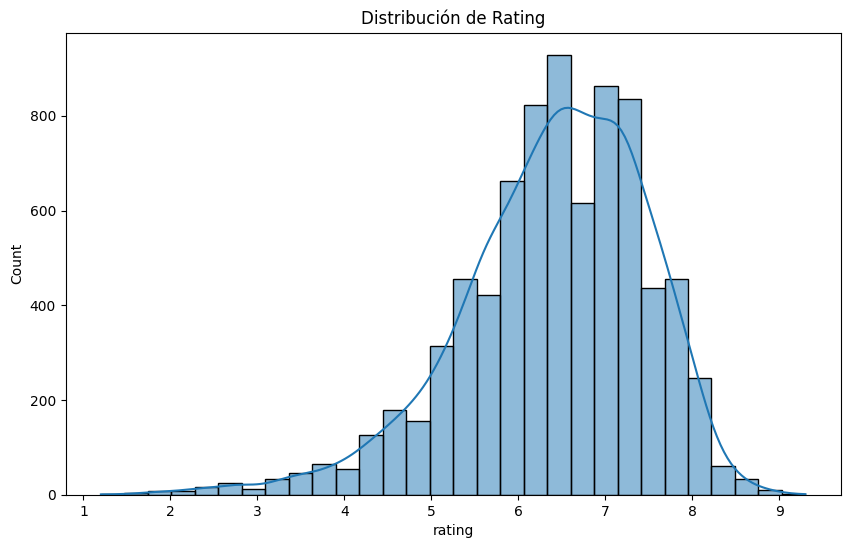

In [ ]:
# Histograma de una variable numérica
plt.figure(figsize=(10, 6))
sns.histplot(dataTraining['rating'], kde=True, bins=30)
plt.title('Distribución de Rating')
plt.show()

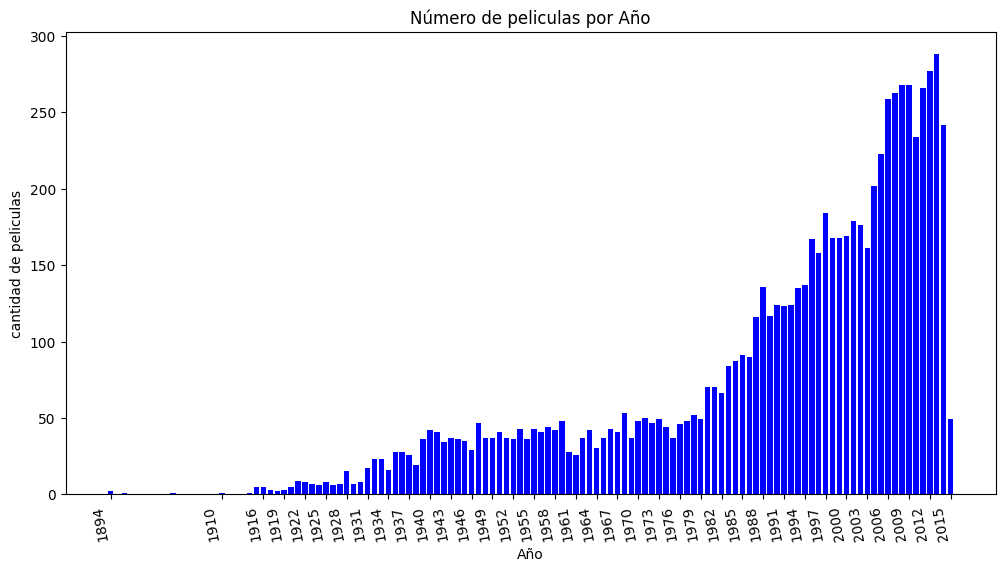

In [ ]:
#Cantidad de peliculas por años en la info de entrenamiento

titulos_por_año = dataTraining.groupby('year')['title'].count()

plt.figure(figsize=(12, 6))

plt.bar(titulos_por_año.index, titulos_por_año.values, color='blue')
plt.xlabel('Año')
plt.ylabel('cantidad de peliculas')
plt.title('Número de peliculas por Año')
plt.xticks(ticks=titulos_por_año.index[::3], labels=titulos_por_año.index[::3], rotation=100, ha='right')

plt.show()

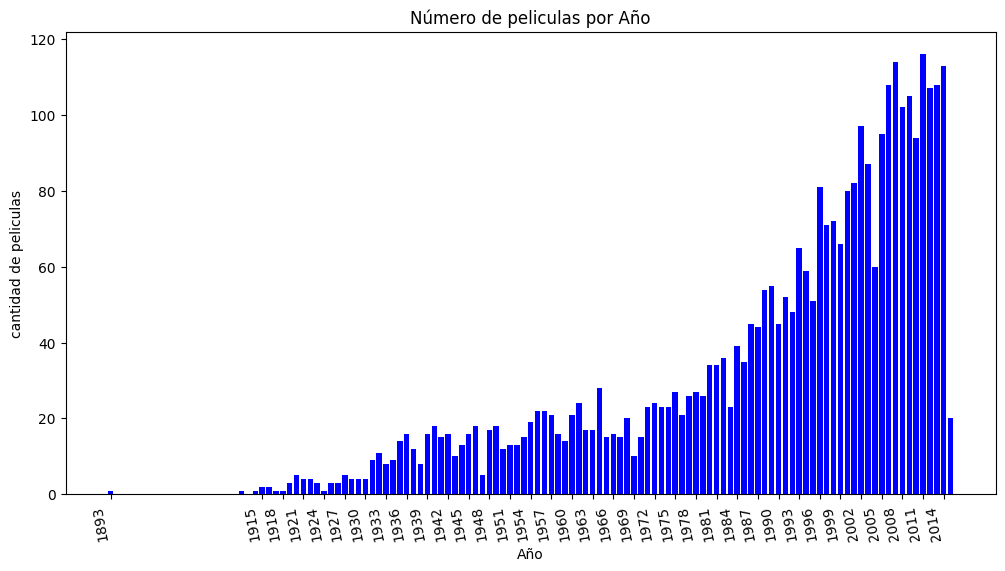

In [ ]:
#Cantidad de peliculas por años en la info de testeo

titulos_por_año = dataTesting.groupby('year')['title'].count()

plt.figure(figsize=(12, 6))

plt.bar(titulos_por_año.index, titulos_por_año.values, color='blue')
plt.xlabel('Año')
plt.ylabel('cantidad de peliculas')
plt.title('Número de peliculas por Año')
plt.xticks(ticks=titulos_por_año.index[::3], labels=titulos_por_año.index[::3], rotation=100, ha='right')

plt.show()

In [ ]:
data= dataTraining

In [ ]:
# Obtener la lista completa de géneros únicos
generos_unicos = set(genero for lista_generos in data['genres'] for genero in lista_generos)

#Asignar valores booleanos para cada genero

for genero in generos_unicos:
    data[genero] = data['genres'].apply(lambda x: 1 if genero in x else 0)


In [ ]:
#Revisión de estructura booleana
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7895 entries, 3107 to 215
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         7895 non-null   int64  
 1   title        7895 non-null   object 
 2   plot         7895 non-null   object 
 3   genres       7895 non-null   object 
 4   rating       7895 non-null   float64
 5   Sci-Fi       7895 non-null   int64  
 6   Western      7895 non-null   int64  
 7   Mystery      7895 non-null   int64  
 8   Musical      7895 non-null   int64  
 9   Adventure    7895 non-null   int64  
 10  Documentary  7895 non-null   int64  
 11  History      7895 non-null   int64  
 12  Animation    7895 non-null   int64  
 13  Music        7895 non-null   int64  
 14  Drama        7895 non-null   int64  
 15  Film-Noir    7895 non-null   int64  
 16  Crime        7895 non-null   int64  
 17  Romance      7895 non-null   int64  
 18  Thriller     7895 non-null   int64  
 19  Fami

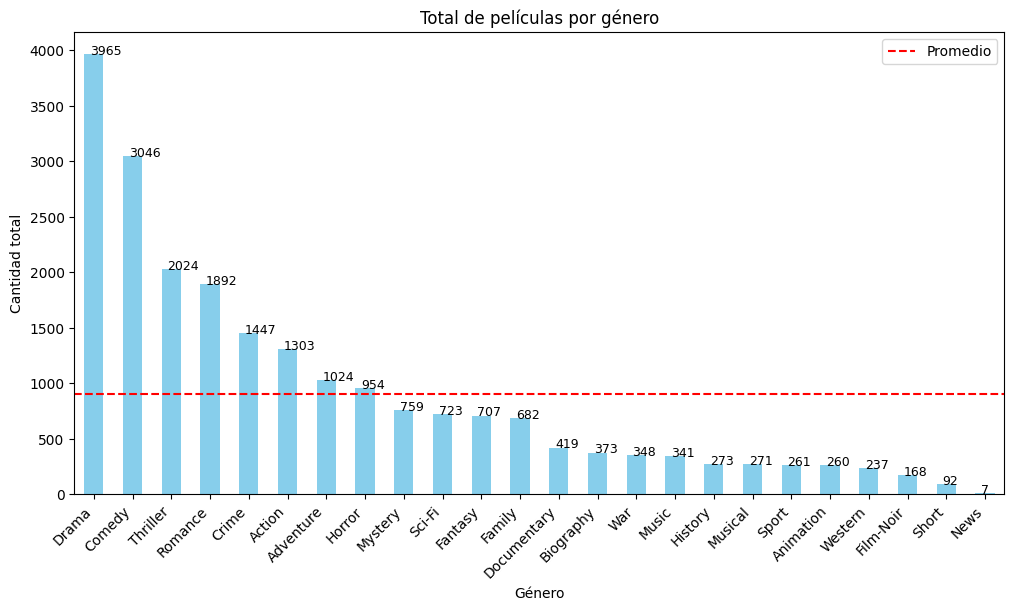

In [ ]:
columnas_relevantes = ['Musical', 'Sci-Fi', 'Biography', 'Adventure', 'Sport', 'Western', 'Music', 'History',
                       'Crime', 'News', 'Documentary', 'Animation', 'Horror', 'Short', 'War', 'Film-Noir',
                       'Action', 'Drama', 'Thriller', 'Comedy', 'Family', 'Fantasy', 'Romance', 'Mystery']

# Sumar la cantidad total por género
total_por_genero = data[columnas_relevantes].sum()

# Calcular la cantidad promedio de películas
cantidad_promedio = total_por_genero.mean()

# Creación del gráfico de barras con sus respectivas etiquetas
plt.figure(figsize=(12, 6))
bars = total_por_genero.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Añadir la línea de la cantidad promedio
plt.axhline(y=cantidad_promedio, color='r', linestyle='--', label='Promedio')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(bar.get_height())), fontsize=9)

plt.title('Total de películas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad total')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [ ]:
# Limpieza de datos, convertir a minusculas, quitar puntuación y eliminar stopwords

def procesar_texto(texto):
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    stopwords_english = set(stopwords.words('english'))
    palabras = [palabra for palabra in texto.split() if palabra not in stopwords_english]
    texto_procesado = ' '.join(palabras)

    return texto_procesado


data['plot_procesado'] = data['plot'].apply(procesar_texto)

In [ ]:
#validación del df
data.head()

,year,title,plot,genres,rating,Sci-Fi,Western,Mystery,Musical,Adventure,...,Biography,Action,Comedy,War,Horror,News,Sport,Short,Fantasy,plot_procesado
3107,2003,Most,most is the story of a single father who takes...,"[Short, Drama]",8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,story single father takes eight year old son w...
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"[Comedy, Crime, Horror]",5.6,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,serial killer decides teach secrets satisfying...
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","[Drama, Film-Noir, Thriller]",7.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sweden female blackmailer disfiguring facial s...
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",[Drama],7.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friday afternoon new york president tredway co...
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","[Action, Crime, Thriller]",6.6,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,los angeles editor publishing house carol hunn...


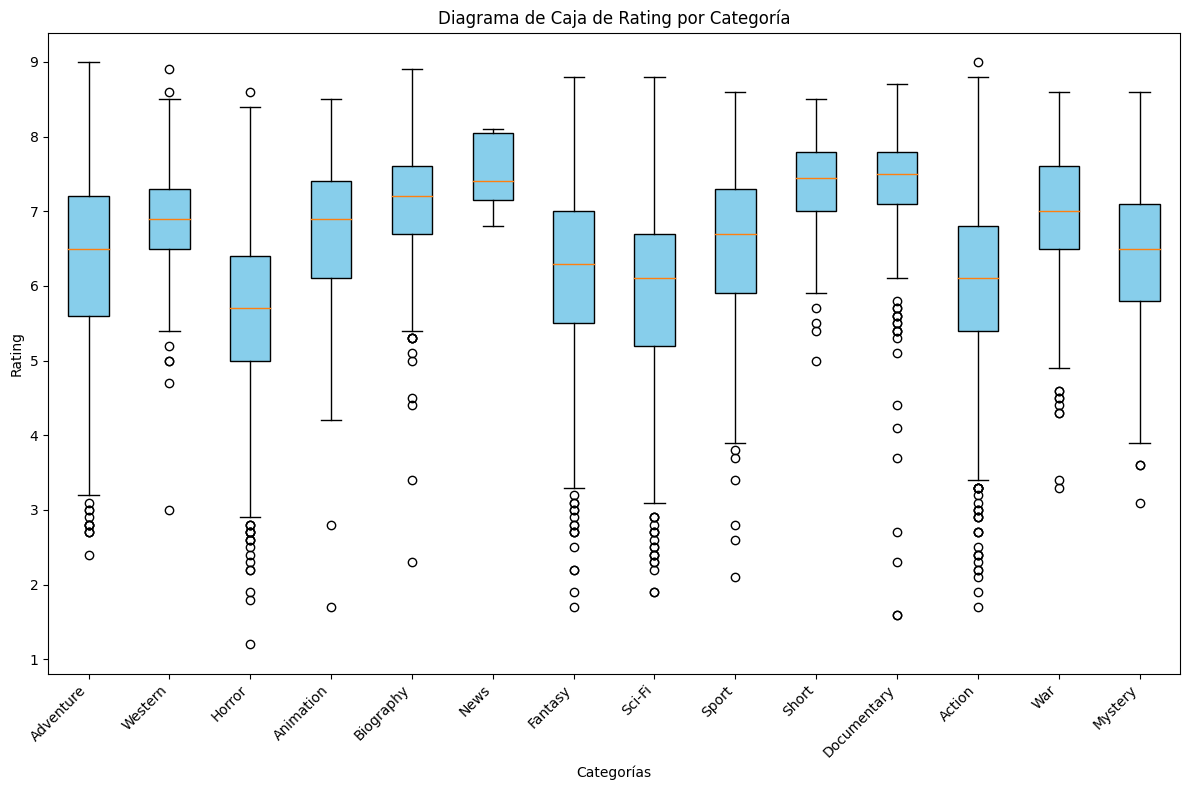

In [ ]:

# Supongamos que 'data' es tu DataFrame
# Aquí, agrupamos por cada categoría y extraemos los valores de 'rating'
categories = ['Adventure', 'Western', 'Horror', 'Animation', 'Biography',
              'News', 'Fantasy', 'Sci-Fi', 'Sport', 'Short', 'Documentary',
              'Action', 'War', 'Mystery']

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Iteramos sobre cada categoría y generamos el diagrama de caja
for category in categories:
    # Filtramos los datos para la categoría actual
    category_data = data[data[category] == 1]
    # Extraemos los valores de rating para la categoría actual
    ratings = category_data['rating']
    # Generamos el diagrama de caja para la categoría actual
    ax.boxplot(ratings, positions=[categories.index(category)], widths=0.5, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Configuramos las etiquetas del eje x
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right')

# Añadimos etiquetas y título
ax.set_xlabel('Categorías')
ax.set_ylabel('Rating')
ax.set_title('Diagrama de Caja de Rating por Categoría')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# creación de diccionario para almacenamiento de las 5 palabras más relevantes
columnas_generos = data.columns[5:]
data_generos = data[columnas_generos]
top_palabras_por_genero = {}

In [ ]:
#listado de top 5 por genero
for genero in columnas_generos:
    # Seleccionar las películas del género actual
    peliculas_genero = data[data[genero] == 1]
    # Obtener todos los textos procesados para ese género
    textos_genero = peliculas_genero['plot_procesado'].tolist()
    # Validar si hay documentos vacios
    if any(textos_genero):
        # Utilizar CountVectorizer para contar las frecuencias de las palabras
        vectorizer = CountVectorizer(stop_words='english', min_df=1)
        matriz_frecuencias = vectorizer.fit_transform(textos_genero)
        # Obtener el vocabulario y las frecuencias de palabras
        vocabulario = vectorizer.get_feature_names_out()
        frecuencias = matriz_frecuencias.sum(axis=0).A1
        # Creación de df con las frecuencias
        df_frecuencias = pd.DataFrame({'Palabra': vocabulario, 'Frecuencia': frecuencias})
        # Seleccionar y organizar las 5 palabras más comunes
        top_palabras = df_frecuencias.sort_values(by='Frecuencia', ascending=False).head(5)
    else:
        top_palabras = pd.DataFrame(columns=['Palabra', 'Frecuencia'])
    # Almacenamiento en diccionario
    top_palabras_por_genero[genero] = top_palabras


for genero, top_palabras in top_palabras_por_genero.items():
    print(f'\nTop 5 de palabras por genero {genero}:\n{top_palabras}')


Top 5 de palabras por genero Sci-Fi:
      Palabra  Frecuencia
3003    earth         228
10820   world         198
6663      new         192
2877       dr         189
5966      man         185

Top 5 de palabras por genero Western:
     Palabra  Frecuencia
4426    town         103
2653     man          75
2761     men          62
2511    life          60
4755    west          52

Top 5 de palabras por genero Mystery:
     Palabra  Frecuencia
6189     man         217
5896    life         201
6876     new         196
7676  police         193
6725  murder         174

Top 5 de palabras por genero Musical:
     Palabra  Frecuencia
3301    love         113
3759     new          96
3199    life          80
2334    girl          55
3389     man          54

Top 5 de palabras por genero Adventure:
      Palabra  Frecuencia
13958   world         280
8582      new         260
7316     life         248
7694      man         245
12764    time         196

Top 5 de palabras por genero Documentary:

ValueError: We need at least 1 word to plot a word cloud, got 0.

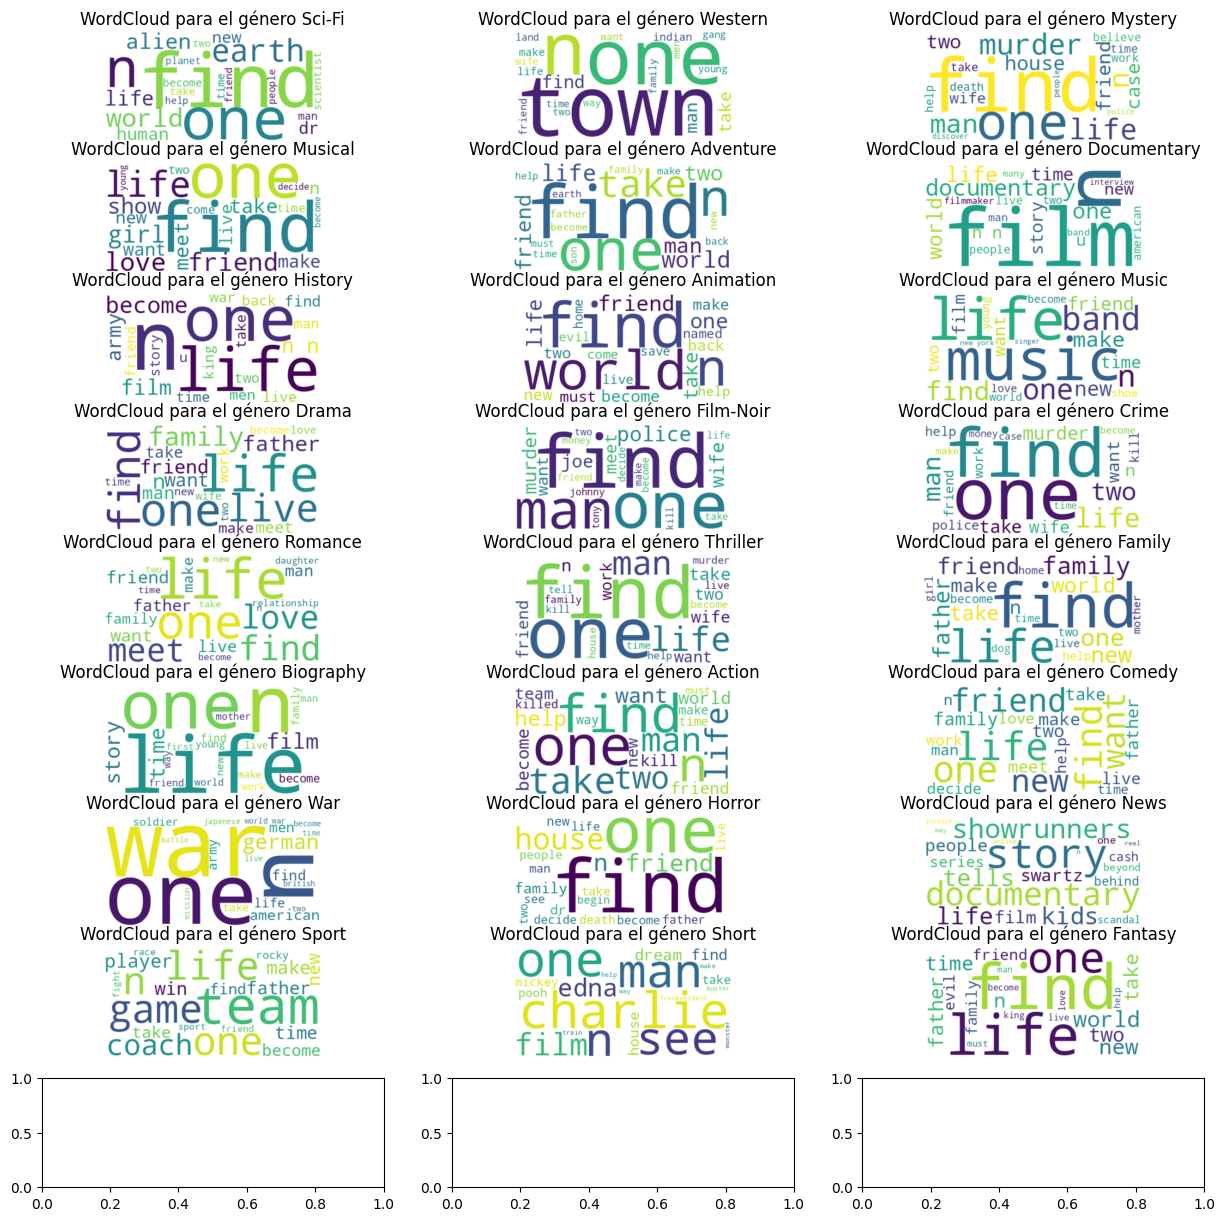

In [ ]:
# Selección de las columanas genero
columnas_generos = data.columns[5:]
data_generos = data[columnas_generos]

#Creación de un collage para cada uno de los generos
fig, axs = plt.subplots(len(columnas_generos)//3 + 1, 3, figsize=(15, 15))

for i, genero in enumerate(columnas_generos):
    # Selección de las películas del género actual
    peliculas_genero = data[data[genero] == 1]

    # Obtención de la trama
    textos_genero = ' '.join(peliculas_genero['plot_procesado'])

    # Creación del collage
    wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=20).generate(textos_genero)

    axs[i//3, i%3].imshow(wordcloud, interpolation='bilinear')
    axs[i//3, i%3].set_title(f'WordCloud para el género {genero}')
    axs[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

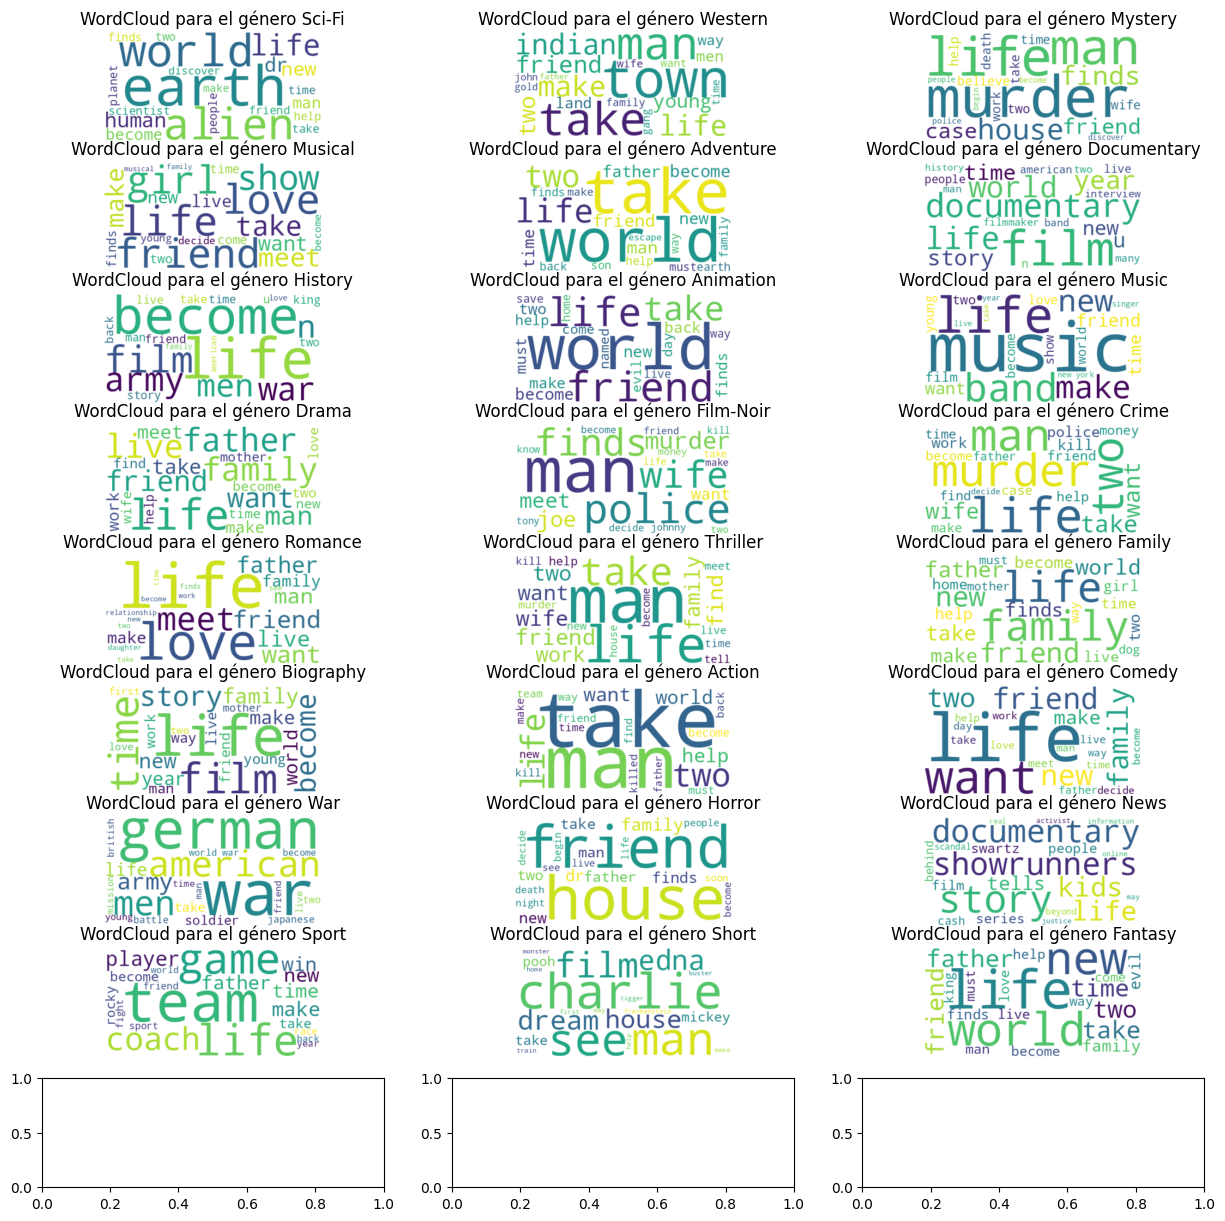

In [ ]:
# En el paso anterior pudimos identificar que palabras como n, find, one se repiten con frecuencia en todos los generos,
# por tal motivo decidimos eliminarlas e imprimir de nuevo el collage
# Palabras a excluir
palabras_excluir = ['find', 'one', 'n']

columnas_generos = data.columns[5:]
data_generos = data[columnas_generos]

fig, axs = plt.subplots(len(columnas_generos)//3 + 1, 3, figsize=(15, 15))

for i, genero in enumerate(columnas_generos):

    peliculas_genero = data[data[genero] == 1]


    textos_genero = ' '.join(peliculas_genero['plot_procesado'])


    for palabra in palabras_excluir:
        textos_genero = textos_genero.replace(f' {palabra} ', ' ')
    wordcloud = WordCloud(width=400, height=200, background_color='white', max_words=20).generate(textos_genero)
    axs[i//3, i%3].imshow(wordcloud, interpolation='bilinear')
    axs[i//3, i%3].set_title(f'WordCloud para el género {genero}')
    axs[i//3, i%3].axis('off')

# Ajustar el diseño y mostrar el collage
plt.tight_layout()
plt.show()


**MODELACIÓN**

XGBOOST CON COUNTVECTORIZER


In [ ]:
# funcion de preprocesamiento de texto
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convertir a minúsculas y eliminar puntuación
        X = X.apply(lambda text: re.sub(r'[^\w\s]', '', text.lower()))

        # Remover stopwords
        stop_words = set(ENGLISH_STOP_WORDS)
        X = X.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

        return X

In [ ]:
# pipeline  preprocesamiento de texto y modelo XGBoost
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', CountVectorizer(max_features=2000)),
    ('classifier', xgb.XGBClassifier())
])

In [ ]:
# Dividir datos train test
X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining['plot'], y_genres, test_size=0.33, random_state=42)

In [ ]:
# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train_genres)

Pipeline(steps=[('preprocessor', TextPreprocessor()),
                ('vectorizer', CountVectorizer(max_features=2000)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=Non..._policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Realizar prediccion
y_pred_genres = pipeline.predict_proba(X_test)

In [ ]:
#  AUC-ROC xgboost CountVectorizer(max_features=2000) preprocesamiento normal
auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print("AUC-ROC Score:", auc_score)

AUC-ROC Score: 0.8197221601037015


XGBOOST CON
N-GRAMAS DE 1-8 Y COUNTVECTORIZER

In [ ]:
# preprocesamiento de texto quitando palabras repetidas
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_words=None):
        self.exclude_words = set(exclude_words) if exclude_words else set()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convertir a minúsculas y eliminar puntuación
        X = X.apply(lambda text: re.sub(r'[^\w\s]', '', text.lower()))

        # Remover stopwords y palabras específicas
        stop_words = set(ENGLISH_STOP_WORDS).union(self.exclude_words)
        X = X.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

        return X

In [ ]:
#Palabras específicas a excluir
exclude_words = {'n', 'one', 'find'}

In [ ]:
# Crear pipeline con preprocesamiento de texto y modelo XGBoost(max_features=8000, ngram_range=(1, 8)))
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(exclude_words=exclude_words)),
    ('vectorizer', CountVectorizer(max_features=8000, ngram_range=(1, 8))),
    ('classifier', xgb.XGBClassifier())
])

In [ ]:
# Dividir datos
X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining['plot'], y_genres, test_size=0.33, random_state=42)

In [ ]:
# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train_genres)

Pipeline(steps=[('preprocessor',
                 TextPreprocessor(exclude_words={'n', 'find', 'one'})),
                ('vectorizer',
                 CountVectorizer(max_features=8000, ngram_range=(1, 8))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=F...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# AUC-ROC score XGBoost(max_features=8000, ngram_range=(1, 8))) CountVectorizer
auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print("AUC-ROC Score:", auc_score)

AUC-ROC Score: 0.8197221601037015


XGBOOST CON N-GRAMAS DE 1-2, LEMATIZACIÓN Y TFIDFVECTORIZER


In [ ]:
# Cargar el modelo de spaCy para lematización
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Definir una clase personalizada para el preprocesamiento de texto
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_words=None):
        self.exclude_words = set(exclude_words) if exclude_words else set()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convertir a minúsculas y eliminar puntuación
        X = X.apply(lambda text: re.sub(r'[^\w\s]', '', text.lower()))

        # Aplicar lematización
        X = X.apply(lambda text: ' '.join([token.lemma_ for token in nlp(text)]))

        # Remover stopwords y palabras específicas
        stop_words = set(ENGLISH_STOP_WORDS).union(self.exclude_words)
        X = X.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

        return X

In [ ]:
# Crear pipeline con preprocesamiento de texto, lematización y modelo XGBoost con TF-IDF Vectorizer ngram_range=(1, 2)
pipeline_tfidf_lemma = Pipeline([
    ('preprocessor', TextPreprocessor(exclude_words=exclude_words)),
    ('vectorizer', TfidfVectorizer(max_features=4000, ngram_range=(1, 2))),
    ('classifier', xgb.XGBClassifier())
])

In [ ]:
# Dividir datos
X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining['plot'], y_genres, test_size=0.33, random_state=42)

In [ ]:
# Entrenar el modelo con el pipeline
pipeline_tfidf_lemma.fit(X_train, y_train_genres)

Pipeline(steps=[('preprocessor',
                 TextPreprocessor(exclude_words={'n', 'find', 'one'})),
                ('vectorizer',
                 TfidfVectorizer(max_features=4000, ngram_range=(1, 2))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=F...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Realizar predicciones
y_pred_genres_tfidf_lemma = pipeline_tfidf_lemma.predict_proba(X_test)
# Calcular y mostrar el AUC-ROC score
auc_score_tfidf_lemma = roc_auc_score(y_test_genres, y_pred_genres_tfidf_lemma, average='macro')
print("AUC-ROC Score con TF-IDF Vectorizer y Lematización:", auc_score_tfidf_lemma)

AUC-ROC Score con TF-IDF Vectorizer y Lematización: 0.8268228875795048


XGBOOST CON N-GRAMAS DE 1-8 CON LEMATIZACIÓN Y COUNTVECTORIZER

In [ ]:
# Descargar recursos adicionales de nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#  preprocesamiento de texto con lematización y CountVectorizer
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_words=None):
        self.exclude_words = set(exclude_words) if exclude_words else set()
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convertir a minúsculas y eliminar puntuación
        X = X.apply(lambda text: re.sub(r'[^\w\s]', '', text.lower()))

        # Tokenizar y lematizar
        X = X.apply(lambda text: ' '.join([self.lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in self.exclude_words]))

        return X

In [ ]:
# Palabras específicas a excluir
exclude_words = {'n', 'one', 'find'}

In [ ]:
# Crear pipeline con preprocesamiento de texto (lematización) y modelo XGBoost con CountVectorizer
pipeline_lemmatization = Pipeline([
    ('preprocessor', TextPreprocessor(exclude_words=exclude_words)),
    ('vectorizer', CountVectorizer(max_features=8000, ngram_range=(1, 8))),
    ('classifier', xgb.XGBClassifier())
])


In [ ]:
# Dividir datos
X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining['plot'], y_genres, test_size=0.33, random_state=42)

In [ ]:
# Entrenar el modelo con el pipeline
pipeline_lemmatization.fit(X_train, y_train_genres)

Pipeline(steps=[('preprocessor',
                 TextPreprocessor(exclude_words={'n', 'find', 'one'})),
                ('vectorizer',
                 CountVectorizer(max_features=8000, ngram_range=(1, 8))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=F...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:

# Realizar predicciones
y_pred_genres_lemmatization = pipeline_lemmatization.predict_proba(X_test)

In [ ]:
# Calcular y mostrar el AUC-ROC score
auc_score_lemmatization = roc_auc_score(y_test_genres, y_pred_genres_lemmatization, average='macro')
print("AUC-ROC Score con lematización y CountVectorizer:", auc_score_lemmatization)

AUC-ROC Score con lematización y CountVectorizer: 0.8148984507559606


XGBOOST CON N-GRAMAS DE 1-8, CON LEMATIZACIÓN, ESTEMATIZACIÓN Y COUNTVECTORIZER


In [ ]:
# Descargar el léxico de WordNet para la lematización (ejecutar solo una vez)
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Definir una clase personalizada para el preprocesamiento de texto
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_words=None, use_lemmatization=True, use_stemming=True):
        self.exclude_words = set(exclude_words) if exclude_words else set()
        self.use_lemmatization = use_lemmatization
        self.use_stemming = use_stemming
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convertir a minúsculas y eliminar puntuación
        X = X.apply(lambda text: re.sub(r'[^\w\s]', '', text.lower()))

        # Tokenizar, lematizar y/o esquematizar según las configuraciones
        if self.use_lemmatization and self.use_stemming:
            X = X.apply(lambda text: ' '.join([self.lemmatizer.lemmatize(self.stemmer.stem(word)) for word in text.split()]))
        elif self.use_lemmatization:
            X = X.apply(lambda text: ' '.join([self.lemmatizer.lemmatize(word) for word in text.split()]))
        elif self.use_stemming:
            X = X.apply(lambda text: ' '.join([self.stemmer.stem(word) for word in text.split()]))

        # Remover stopwords y palabras específicas
        stop_words = set(ENGLISH_STOP_WORDS).union(self.exclude_words)
        X = X.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

        return X


In [ ]:
# Palabras específicas a excluir
exclude_words = {'n', 'one', 'find'}

In [ ]:
# Crear pipeline con preprocesamiento de texto, lematización, stemmatización y modelo XGBoost con CountVectorizer
pipeline_countvectorizer_lemma_stem = Pipeline([
    ('preprocessor', TextPreprocessor(exclude_words=exclude_words, use_lemmatization=True, use_stemming=True)),
    ('vectorizer', CountVectorizer(max_features=8000, ngram_range=(1, 8))),
    ('classifier', xgb.XGBClassifier(
        learning_rate=0.05,
        n_estimators=400,
        max_depth=5,
        min_child_weight=1,
        subsample=1,
        colsample_bytree=0.8,
        objective='binary:logistic',
        scale_pos_weight=1,
        random_state=42
    ))
])

In [ ]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining['plot'], y_genres, test_size=0.33, random_state=42)

In [ ]:
# Entrenar el modelo con el pipeline
pipeline_countvectorizer_lemma_stem.fit(X_train, y_train_genres)

Pipeline(steps=[('preprocessor',
                 TextPreprocessor(exclude_words={'n', 'find', 'one'})),
                ('vectorizer',
                 CountVectorizer(max_features=8000, ngram_range=(1, 8))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fa...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=400,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_genres_lemma_stem = pipeline_countvectorizer_lemma_stem.predict_proba(X_test)
# Calcular y mostrar el AUC-ROC score
auc_score_lemma_stem = roc_auc_score(y_test_genres, y_pred_genres_lemma_stem, average='macro')
print("AUC-ROC Score con CountVectorizer, Lematización y Stemmatización:", auc_score_lemma_stem)

AUC-ROC Score con CountVectorizer, Lematización y Stemmatización: 0.8482401040750264


XGBOOST CON N-GRAMAS DE 1-2, CON LEMATIZACIÓN Y TFIDFVECTORIZER

In [ ]:
# XGBOOST y lematización

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', OneVsRestClassifier(XGBClassifier(random_state=42)))
])

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')

AUC: 0.8221556835989965


CLASIFICACIÓN MULTINOMIAL NAIVE BAYES CON LEMATIZACION Y TFIDFVECTORIZER


In [ ]:
# se crea una función de limpieza que emplea tecnicas como text.lower(), para convertir todo el texto en minúscula, se eliminan caracteres no alfabeticos,
#se realiza un tokenización, eliminación de stopwords y palabras especificas mencionadas previamente
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english') and word not in ['find', 'one', 'n']]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Aplicamos la limpieza en el df
dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# se vectoriza con TF-IDF
vect = TfidfVectorizer(max_features=2000, stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot_clean'])

# Se transforman las etiquetas de géneros de strings a listas, y luego se aplican
# técnicas de binarización para convertirlas en un formato adecuado para el modelado multietiqueta.
dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y_genres = mlb.fit_transform(dataTraining['genres'])

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

# Modelo de clasificación con MultinomialNB
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')



AUC: 0.826431020860464


REGRESIÓN LOGÍSTICA MULTINOMIAL CON LEMATIZACIÓN, TFIDFVECTORIZER Y GRIDSEARCH


In [ ]:
from sklearn.model_selection import GridSearchCV

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

# Combinación de hiperparametros para seleccionar el mejor modelo de acuerdo con el rendimiento de la validación cruzada
param_grid = {
    'tfidf__max_features': [5000, 7000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__estimator__C': [0.01, 0.1, 1, 10],
    'clf__estimator__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados
print("los mejores hiperparámetros fueron:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predicción con el mejor modelo
y_pred_optimized = best_model.predict_proba(X_test)

# Calcular y mostrar el AUC mejorado
roc_auc_optimized = roc_auc_score(y_test, y_pred_optimized, average='macro')
print(f'AUC Mejorado: {roc_auc_optimized}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
los mejores hiperparámetros fueron: {'clf__estimator__C': 1, 'clf__estimator__penalty': 'l2', 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2)}
AUC Mejorado: 0.879147739478434


REGRESIÓN LOGISTICA MULTINOMIAL CON N-GRAMAS DE 1-2, LEMATIZACIÓN Y TFIDFVECTORIZER


In [ ]:
# Modelo regresión logistica y lematización

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')



AUC: 0.8813210841388598


RANDOM FOREST CON LEMATIZACIÓN Y COUNTVECTORIZER

In [ ]:
# Modelo Random Forest

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Tokenización y secuenciación de texto
vect = CountVectorizer(max_features=10000)
X_dtm = vect.fit_transform(dataTraining['plot_clean'])

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size = 0.33, random_state = 18)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))
print('y_train size: {}, y_test size: {}'.format(y_train.shape, y_test.shape))

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')

X_train size: (5289, 10000), X_test size: (2606, 10000)
y_train size: (5289, 24), y_test size: (2606, 24)
AUC: 0.8206789295603701


RANDOM FOREST CON N-GRAMAS DE 1-2, LEMATIZACIÓN Y COUNTVECTORIZER

In [ ]:
# Modelo Random Forest 2 intento

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', OneVsRestClassifier(RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)))
])

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')


AUC: 0.8169025592772169


SUPPORT VECTOR MACHINE CON N-GRAMAS DE 1-2, LEMATIZACIÓN Y TFIDFVECTORIZER

In [ ]:
# Support Vector Machine con lematización

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', OneVsRestClassifier(SVC(probability=True, random_state=42, C=1.0, kernel='sigmoid')))
])

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')


AUC: 0.8463495989894607


SUPPORT VECTOR MACHINE CON N-GRAMAS DE 1-2, ESTEMATIZACIÓN Y TFIDFVECTORIZER


In [ ]:
# Support Vector Machine con stemmer

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

custom_stopwords = set(["find", "one", "n"])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) #Elimina caracteres que no sean minusculas o en blanco
    text = re.sub(r'\d+', '', text)  # Eliminar números
    stop_words = set(stopwords.words('english')) | custom_stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', OneVsRestClassifier(SVC(probability=True, random_state=42, C=1.0, kernel='sigmoid')))
])

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')


AUC: 0.8508689437406298


REGRESIÓN LOGISTICA MULTINOMIAL CON N-GRAMAS DE 1-3, ESTEMATIZACION Y TFIDFVECTORIZER


In [ ]:
# Modelo regresión logistica y stemmer

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

#custom_stopwords = set(["find", "one", "n"])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) #Elimina caracteres que no sean minusculas o en blanco
    text = re.sub(r'\d+', '', text)  # Eliminar números
    stop_words = set(stopwords.words('english')) #| custom_stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

#dataTraining.dropna(subset=['plot_clean', 'genres'], inplace=True)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 3))),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')


AUC: 0.8820493811863223


REGRESIÓN LOGISTICA MULTINOMIAL CON N-GRAMAS DE 1-3, ESTEMATIZACION Y COUNTVECTORIZER

In [ ]:
# Modelo regresión logistica y stemmer y CountVectorizer

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

#custom_stopwords = set(["find", "one", "n"])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) #Elimina caracteres que no sean minusculas o en blanco
    text = re.sub(r'\d+', '', text)  # Eliminar números
    stop_words = set(stopwords.words('english')) #| custom_stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

#dataTraining.dropna(subset=['plot_clean', 'genres'], inplace=True)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('cVect', CountVectorizer(max_features=10000, ngram_range=(1, 3))),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')

AUC: 0.8351134545307506


REGRESIÓN LOGISTICA MULTINOMIAL CON
WORD2VEC


In [ ]:
# Modelo regresión logistica y Word2Vec

dataTraining['genres'] = dataTraining['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(dataTraining['genres'])

#custom_stopwords = set(["find", "one", "n"])

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) #Elimina caracteres que no sean minusculas o en blanco
    text = re.sub(r'\d+', '', text)  # Eliminar números
    stop_words = set(stopwords.words('english')) #| custom_stopwords
    #words = text.split()
    #words = [w for w in words if w not in stop_words]
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]
    #stemmer = PorterStemmer()
    #words = [stemmer.stem(word) for word in words]
    return ' '.join(tokens)

dataTraining['plot_clean'] = dataTraining['plot'].apply(clean_text)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(dataTraining['plot_clean'], y, test_size=0.33, random_state=42)

sentences = [sentence.split() for sentence in X_train]
model = Word2Vec(sentences, vector_size=1000, window=2, negative=50, min_count=5, workers=4)

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(words_vecs) == 0:
        return np.zeros(1000)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    #('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 3))),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

print(X_train.shape, y_train.shape)

model.fit(X_train, y_train)

# PRedicción de las probabilidades en el conjunto de prueba
y_pred = model.predict_proba(X_test)

# Calculo y muestra del AUC
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(f'AUC: {roc_auc}')

(5289, 1000) (5289, 24)
AUC: 0.651617059026487


## **2. Grid Search**

Busqueda de mejores hiperparámetros

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords_list = stopwords.words('english')


y = y_genres.copy()

# limpieza
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) #Elimina caracteres que no sean minusculas o en blanco
    text = re.sub(r'\d+', '', text)  # Eliminar números
    stop_words = set(stopwords.words('english')) #| custom_stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)
X = dataTraining['plot'].apply(clean_text)

# Se divide la base en datos de entrenamiento y prueba con los mismo parametros del modelo base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Crear el pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

# # Definir los parámetros a buscar en el Grid Search
# parameters = {
#     'tfidf__max_features': [8000, 10000, 15000, 20000, 30000],
#     'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 1), (2,2)],
#     'clf__estimator__C': [0.1, 1, 9, 10, 11],
#     'clf__estimator__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
# }

# Definir los parámetros a buscar en el Grid Search
parameters = {
    'tfidf__max_features': [8000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__estimator__C': [1, 9, 10, 11],
    'clf__estimator__solver': ['liblinear', 'lbfgs']
}

# Convertir la función de métrica personalizada en un objeto scorer
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, average='macro')

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1, scoring=auc_scorer)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

# Mejor combinación de parámetros
print("Best parameters found:")
print(grid_search.best_params_)

"""
Best parameters found:
{'clf__estimator__C': 11, 'clf__estimator__solver': 'lbfgs', 'tfidf__max_features': 8000, 'tfidf__ngram_range': (1, 3)}
AUC: 0.8774996838802637
"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:
{'clf__estimator__C': 11, 'clf__estimator__solver': 'liblinear', 'tfidf__max_features': 8000, 'tfidf__ngram_range': (1, 3)}


"\nBest parameters found:\n{'clf__estimator__C': 11, 'clf__estimator__solver': 'lbfgs', 'tfidf__max_features': 8000, 'tfidf__ngram_range': (1, 3)}\nAUC: 0.8774996838802637\n"

REGRESIÓN LOGISTICA MULTINOMIAL CON ESTEMATIZACION, TFIDFVECTORIZER Y VALIDACIÓN CRUZADA (K-FOLD)


## **K-Fold**

Se realiza para evaluar los hiperparámetros del grid search

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.multioutput import MultiOutputClassifier

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

# limpieza
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)                        # Elimina caracteres que no sean minusculas o en blanco
    text = re.sub(r'\d+', '', text)                             # Eliminar números
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)
X = dataTraining['plot'].apply(clean_text)

# Crear y entrenar el modelo con pipeline ya que incluye tanto la vectorización TF-IDF como un clasificador de regresión logística
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=8000, ngram_range=(1, 3))),
    ('clf', MultiOutputClassifier(LogisticRegression(solver='liblinear', C=11)))   # 0.89
    # ('svm', MultiOutputClassifier(SVC(kernel='rbf')))                        #
    # ('gbm', MultiOutputClassifier(GradientBoostingClassifier()))             #
    # ('lda', MultiOutputClassifier(LinearDiscriminantAnalysis()))               #
    # ('rf', MultiOutputClassifier(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_estimators=100, max_depth=3))) #0.84
    # ('knn', KNeighborsClassifier(n_neighbors=500))                                # 0.87
])

kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
# Imprimir el modelo gbm
print(f"AUC promedio: {scores[~np.isnan(scores)].mean():.4f}")

AUC promedio: 0.8933


## **1. Busqueda de clasificator y Vectorizador**

(Muy demorado en ejecutar)

In [ ]:
import nltk
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

# Lectura datos
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

# Binarizacion de los labels
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y = le.fit_transform(dataTraining['genres'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim import downloader
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.multioutput import MultiOutputClassifier

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

# limpieza basica
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)                        # Elimina caracteres que no sean minusculas o en blanco
    text = re.sub(r'\d+', '', text)                             # Eliminar números
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)
X = dataTraining['plot'].apply(clean_text)

# --------------------------------------------- Word2vect -----------------------

class W2V(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=10000, window=5, negative=20, min_count=2, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.negative = negative
        self.min_count = min_count
        self.workers = workers
    def fit(self, X, y=None):
        sentences = [sentence.split() for sentence in X]
        self.model = Word2Vec(sentences, vector_size=self.vector_size, window=self.window,
                              negative=self.negative, min_count=self.min_count, workers=self.workers)
        return self
    def transform(self, X):
        def vectorize(sentence):
            words = sentence.split()
            words_vecs = [self.model.wv[word] for word in words if word in self.model.wv]
            if len(words_vecs) == 0:
                return np.zeros((self.vector_size,))
            else:
                padded_vecs = np.zeros((len(words_vecs), self.vector_size))
                for i, vec in enumerate(words_vecs):
                    padded_vecs[i, :len(vec)] = vec
                return np.mean(padded_vecs, axis=0)
        return np.array([vectorize(sentence) for sentence in X])

# -------------------------------------- Pre-entrenado --------------------------
glove_model = downloader.load("glove-wiki-gigaword-50")

class Preentre(BaseEstimator, TransformerMixin):
    def __init__(self, glove_model):
        self.glove_model = glove_model
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        def document_vector(doc):
            words = doc.split()
            vectors = [self.glove_model[word] for word in words if word in self.glove_model]
            if len(vectors) == 0:
                return np.zeros(self.glove_model.vector_size)  # Tamaño del vector GloVe
            return np.mean(vectors, axis=0)
        return np.array([document_vector(doc) for doc in X])

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
clasi =[
    ('lre', MultiOutputClassifier(LogisticRegression(solver='liblinear'))),
    # ('svm', MultiOutputClassifier(SVC(kernel='rbf'))),
    ('gbm', MultiOutputClassifier(GradientBoostingClassifier())),
    # ('lda', MultiOutputClassifier(LinearDiscriminantAnalysis())),
    ('knn', KNeighborsClassifier(n_neighbors=150)),
    ('rf', MultiOutputClassifier(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_estimators=100, max_depth=3))) #0.84

]

vecto = [
    ('preen', Preentre(glove_model)),
    # ('wo2ve', W2V()),
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2)))
    ('cvect', CountVectorizer(max_features=10000))
]

result = pd.DataFrame()
for vt in vecto:
  for cl in clasi:
    print(cl[0])

  # Modelado
    model = Pipeline([
        vt,
        cl
    ])
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    # Realizar validación cruzada
    scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
    # Imprimir el modelo gbm
    print(f"AUC promedio: {scores[~np.isnan(scores)].mean():.4f}")
    n = {'AUC':scores[~np.isnan(scores)].mean(), 'clasi': cl[0], 'vecto':vt[0]}
    result = result.append(n, ignore_index=True)
    print(n)
    print(' ')
result.to_excel('resultados.xlsx',index=False)

TypeError: 'tuple' object is not callable